# **Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris


# **Data Preprocessing**



In [ ]:
# Memuat dataset Wine dari scikit-learn
iris = datasets.load_iris()

X = iris.data    # inputan untuk machine learning
y = iris.target  # output yang dinginkan dari machine learning

# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.Series(y, name='target')

In [ ]:
# Menampilkan data X
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Menampilkan data Y
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# **Exploratory Data And Analysis (EDA)**

In [ ]:
# Menampilkan kumpulan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# menghitung banyaknya missing values
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
# Hitung label target
df_y.value_counts()

,count
target,
0,50
1,50
2,50


In [ ]:
# statistik data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


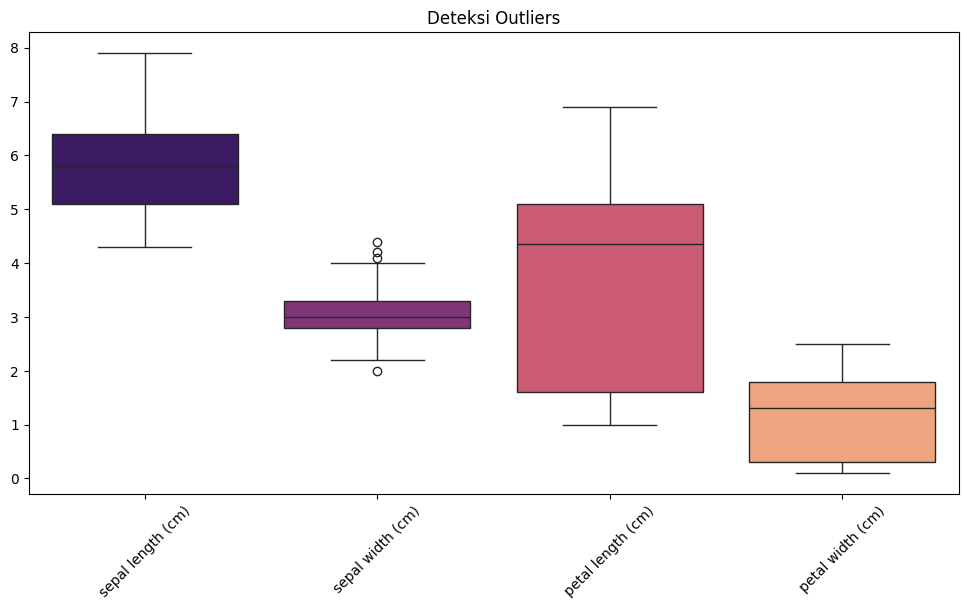

In [ ]:
# Membuat boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1], palette="magma")
plt.xticks(rotation=45)
plt.title("Deteksi Outliers")
plt.show()


In [ ]:
# Penanganan outlier menggunakan Z-score
df_X = df.select_dtypes(include=[np.number]).drop(columns=['target'], errors='ignore')
df_y = df['target']

# Hitung Z-score untuk setiap nilai dalam df_X
df_zscore = np.abs(stats.zscore(df_X))

# Tentukan threshold untuk mendeteksi outlier
threshold = 3

# Filter data berdasarkan threshold Z-score
filtered_idx = (df_zscore < threshold).all(axis=1)  # Mengambil data yang tidak outlier
X_filtered = df_X[filtered_idx]
y_filtered = df_y[filtered_idx]

print(f"Jumlah data sebelum filtering: {df_X.shape[0]}")
print(f"Jumlah data setelah filtering: {X_filtered.shape[0]}")


Jumlah data sebelum filtering: 150
Jumlah data setelah filtering: 149


# **Data Modelling**

## Split Data

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=(35))

## Train the Model

In [ ]:
# Membuat dan melatih model Random Forest Classifier
model = RandomForestClassifier(random_state=35)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=35)

## Predict & Evaluate

In [ ]:
# Memprediksi dan mengevaluasi
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 11]]
Akurasi: 96.67%


# **Data Visualization**

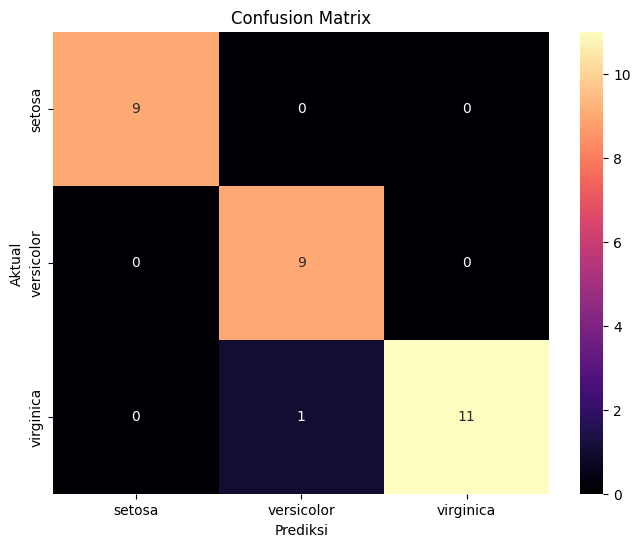

In [ ]:
# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix dengan warna magma
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()



             Feature  Importance
3   petal width (cm)    0.444719
2  petal length (cm)    0.410639
0  sepal length (cm)    0.122172
1   sepal width (cm)    0.022469


<ipython-input-17-692f10a8f4ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="magma")


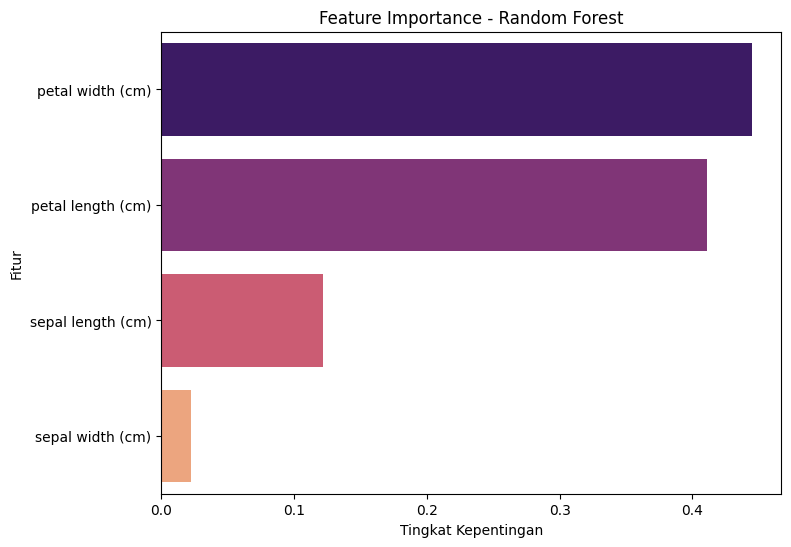

In [ ]:
# Mengambil nilai feature importance
feature_importance = pd.DataFrame({
    "Feature": df_X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Menampilkan Feature Importance
print(feature_importance)

# Visualisasi Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="magma")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.title("Feature Importance - Random Forest")
plt.show()


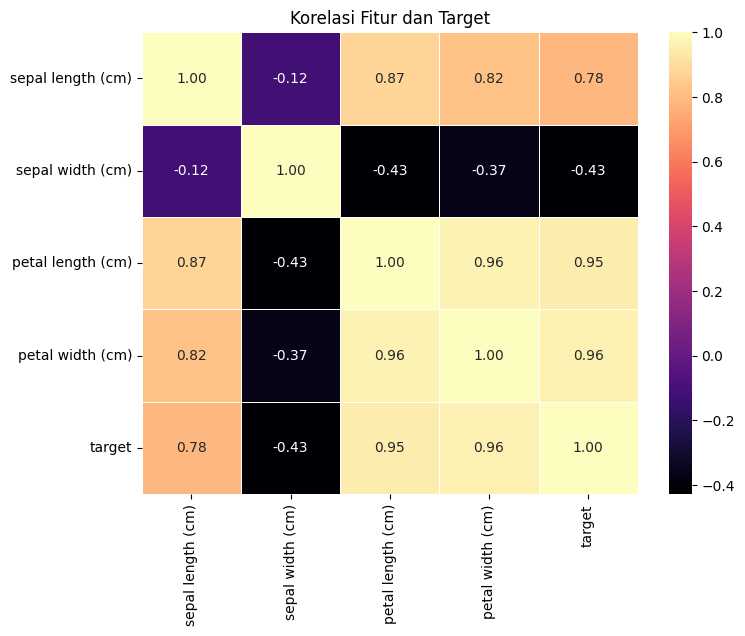

Features with the highest correlation to the target:
 petal width (cm)     0.956265
petal length (cm)    0.948503
sepal length (cm)    0.785175
sepal width (cm)     0.416872
Name: target, dtype: float64


In [ ]:
# Hitung korelasi
correlation_matrix = df.corr()

# Visualisasi heatmap korelasi penuh
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="magma", linewidths=0.5, fmt=".2f")
plt.title("Korelasi Fitur dan Target")
plt.show()

# Melihat fitur yang paling berkorelasi dengan target
correlation = pd.concat([X_filtered, y_filtered], axis=1).corr()['target'].drop('target')
print("Features with the highest correlation to the target:\n", correlation.abs().sort_values(ascending=False).head(10))

<Figure size 1000x800 with 0 Axes>

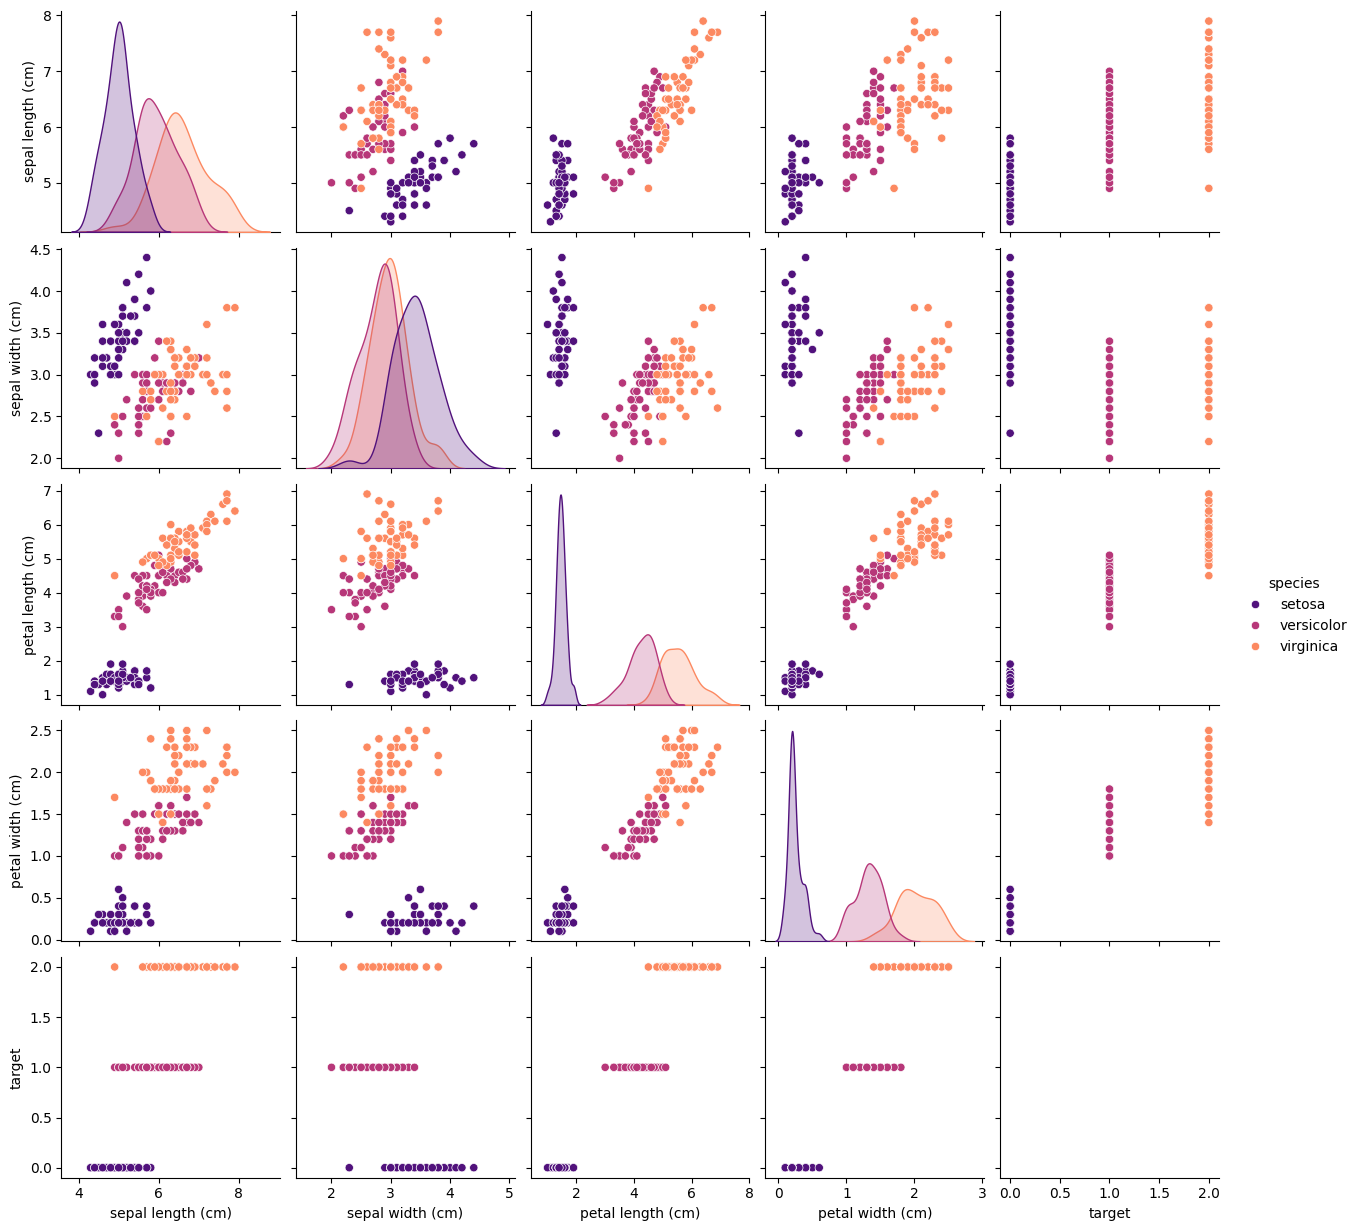

In [ ]:
# Load dataset Iris
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Visualisasi Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="species", palette="magma")

# Tampilkan plot
plt.show()
